## Image Classification of Cifar10 dataset using CNN

In [ ]:
# keras imports for the dataset and building our neural network

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from torch.utils.data import DataLoader, Subset
from keras.utils import np_utils
from keras.utils import to_categorical
from keras.datasets import cifar10
import tensorflow as tf
import tensorflow_datasets as tfds
import os

## Airplane vs Automobile

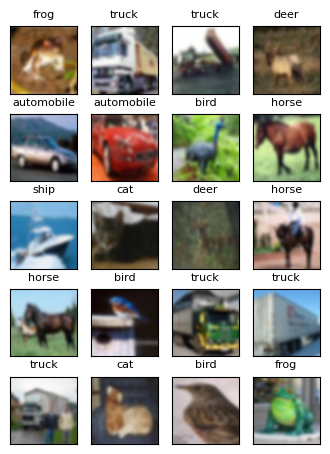

The size of training data is 10000
The size of testing data is 2000
The labels present in testing data are [0 1]


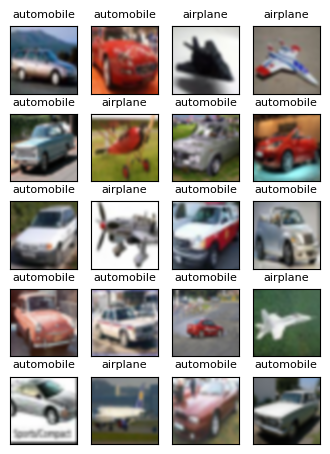

In [ ]:
#Loading the dataset
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 8})
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
classes_to_keep = [0, 1] # Index of the classes we wish to classify

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(4, 5.5),
                         subplot_kw={'xticks': [], 'yticks': []})

# Plot the first 10 images from the training set
for i, ax in enumerate(axes.flat):
    if i < 20:
        # Plot the image with bicubic interpolation
        ax.imshow(X_train[i], interpolation = 'bicubic')

        # Set the title to the class name
        class_idx = y_train[i][0]
        ax.set_title(class_names[class_idx], fontdict={'fontsize': plt.rcParams['font.size']})

plt.show()

# building the input vector from the 32x32 pixels
keep_indices_train = tf.reduce_any(tf.equal(y_train, classes_to_keep), axis=1)
keep_indices_test = tf.reduce_any(tf.equal(y_test, classes_to_keep), axis=1)
X_train = X_train[keep_indices_train]
Y_train = y_train[keep_indices_train]
X_test = X_test[keep_indices_test]
Y_test = y_test[keep_indices_test]
print('The size of training data is ' + str(X_train.shape[0]))
print('The size of testing data is ' + str(X_test.shape[0]))
unique_labels = np.unique(Y_test)
print('The labels present in testing data are ' + str(unique_labels))

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255


# Plot the first 10 images from the updated training set
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(4, 5.5),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    if i < 20:
        # Plot the image with bicubic interpolation
        ax.imshow(X_train[i], interpolation = 'bicubic')

        # Set the title to the class name
        class_idx = Y_train[i][0]
        ax.set_title(class_names[class_idx], fontdict={'fontsize': plt.rcParams['font.size']})

plt.show()

In [ ]:
# One-hot encoding using keras numpy-related utilities
num_classes = len(classes_to_keep)
Y_test = to_categorical(Y_test, num_classes)
Y_train = to_categorical(Y_train, num_classes)

In [ ]:
def get_model():
  # building a linear stack of layers with the sequential model
  model = Sequential()

  # convolutional layer using elu activation
  model.add(Conv2D(32, kernel_size=(1,1), strides=(1,1), activation='elu', input_shape=(32, 32, 3)))

  # convolutional layer
  model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), activation='elu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(64, kernel_size=(1,1), strides=(1,1), activation='elu'))
  model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), activation='elu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(128, kernel_size=(1,1), strides=(1,1), activation='elu'))
  model.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), activation='elu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  # flatten output of conv
  model.add(Flatten())

  # Fully connected hidden layer
  model.add(Dense(1024, activation='elu')) 
  model.add(Dropout(0.3))
  model.add(Dense(512, activation='elu'))
  model.add(Dropout(0.3))
  # output layer
  model.add(Dense(2, activation='softmax')) # The number 2 specifies the number of classes that the model should classify the inputs into.
  return model




In [ ]:
# Compiling the sequential model
model = get_model()
# Using adam optimizer and crossentropy loss function
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        128       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        2112      
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

In [ ]:
# Training the model for 20 epochs
history = model.fit(X_train, Y_train, batch_size=128, epochs=20 , validation_data=(X_test,Y_test))
# Stores the predicted value 
y_pred = model.predict(X_test) 

Epoch 1/20
79/79 [==============================] - 16s 34ms/step - loss: 0.5171 - accuracy: 0.7495 - val_loss: 0.3134 - val_accuracy: 0.8710
Epoch 2/20
79/79 [==============================] - 1s 13ms/step - loss: 0.3543 - accuracy: 0.8466 - val_loss: 0.2779 - val_accuracy: 0.8825
Epoch 3/20
79/79 [==============================] - 1s 14ms/step - loss: 0.2810 - accuracy: 0.8830 - val_loss: 0.2297 - val_accuracy: 0.9015
Epoch 4/20
79/79 [==============================] - 1s 14ms/step - loss: 0.2588 - accuracy: 0.8929 - val_loss: 0.1907 - val_accuracy: 0.9255
Epoch 5/20
79/79 [==============================] - 1s 14ms/step - loss: 0.2198 - accuracy: 0.9074 - val_loss: 0.1779 - val_accuracy: 0.9270
Epoch 6/20
79/79 [==============================] - 1s 14ms/step - loss: 0.2015 - accuracy: 0.9177 - val_loss: 0.1892 - val_accuracy: 0.9240
Epoch 7/20
79/79 [==============================] - 1s 13ms/step - loss: 0.1890 - accuracy: 0.9237 - val_loss: 0.2074 - val_accuracy: 0.9175
Epoch 8/20
7

Actual labels


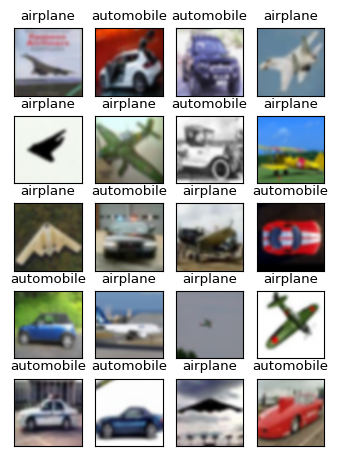

Predicted labels


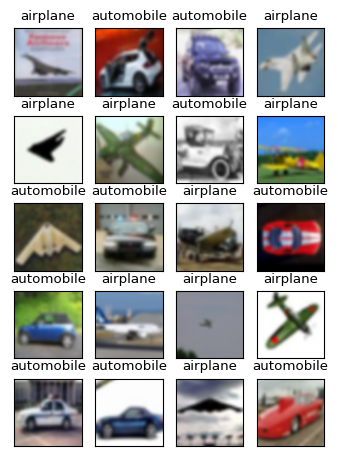

In [ ]:
print("Actual labels")
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(4, 5.5),
                         subplot_kw={'xticks': [], 'yticks': []})

# Plot the test images and their actual labels
for i, ax in enumerate(axes.flat):
    if i < 20:
        # Plot the image with bicubic interpolation
        ax.imshow(X_test[i], interpolation='bicubic')

        # Set the title to the actual class name
        actual_idx = np.argmax(Y_test[i])
        ax.set_title(class_names[actual_idx])

plt.show()

print("Predicted labels")

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(4, 5.5),
                         subplot_kw={'xticks': [], 'yticks': []})



# Plot the test images and their predicted labels
for i, ax in enumerate(axes.flat):
    if i < 20:
        # Plot the image with bicubic interpolation
        ax.imshow(X_test[i], interpolation='bicubic')

        # Set the title to the predicted class name
        pred_idx = np.argmax(y_pred[i])
        ax.set_title(class_names[pred_idx])

plt.show()

## Model Accuracy

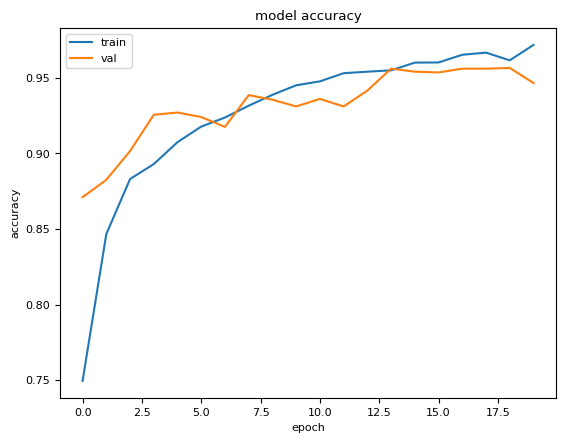

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Model Loss

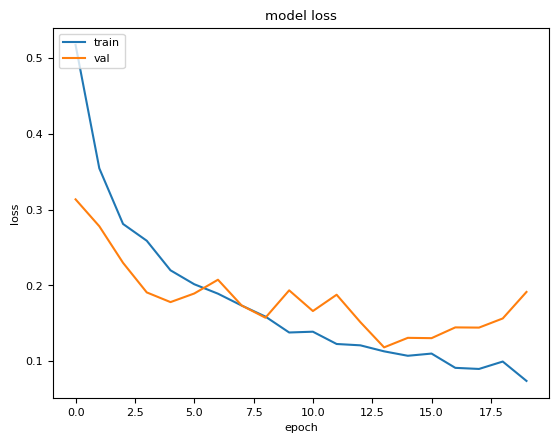

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Performance of the Model

In [ ]:
model.evaluate(X_test, Y_test)

63/63 [==============================] - 0s 4ms/step - loss: 0.1913 - accuracy: 0.9465


[0.19128473103046417, 0.9465000033378601]

## CAT vs DOG

In [ ]:
# loading the dataset
import numpy as np
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
classes_to_keep = [3, 5] # Code for the classes to keep

# # building the input vector from the 32x32 pixels
keep_indices_train = tf.reduce_any(tf.equal(y_train, classes_to_keep), axis=1)
keep_indices_test = tf.reduce_any(tf.equal(y_test, classes_to_keep), axis=1)
X_train = X_train[keep_indices_train]
Y_train = y_train[keep_indices_train]
X_test = X_test[keep_indices_test]
Y_test = y_test[keep_indices_test]
print('The size of training data is ' + str(X_train.shape[0]))
print('The size of testing data is ' + str(X_test.shape[0]))
unique_labels = np.unique(Y_test)
print('The labels present in testing data are ' + str(unique_labels))
unique_labels = np.unique(Y_test)
print(f"Unique labels in Y_test: {unique_labels}")

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

The size of training data is 10000
The size of testing data is 2000
The labels present in testing data are [3 5]
Unique labels in Y_test: [3 5]


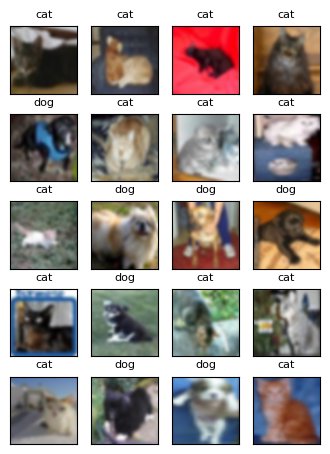

In [ ]:
# Plot the first 20 images from the updated training set
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(4, 5.5),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    if i < 20:
        # Plot the image with bicubic interpolation
        ax.imshow(X_train[i], interpolation = 'bicubic')

        # Set the title to the class name
        class_idx = Y_train[i][0]
        ax.set_title(class_names[class_idx], fontdict={'fontsize': plt.rcParams['font.size']})

plt.show()

In [ ]:
# Convert to 1 hot encoding
Y_test = np.array([int((i-3)/2) for i in Y_test])
Y_train = np.array([int((i-3)/2) for i in Y_train])

In [ ]:
print(f"Unique labels in Y_test: {unique_labels}")

Unique labels in Y_test: [3 5]


In [ ]:
num_classes = len(classes_to_keep)
Y_test = to_categorical(Y_test, num_classes)


#print("Shape before one-hot encoding: ", Y_train.shape)
Y_train = to_categorical(Y_train, num_classes)

In [ ]:
model = get_model()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        128       
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 15, 15, 64)        2112      
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 64)        36928     
                                                      

In [ ]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=20 , validation_data=(X_test,Y_test))
# Stores the predicted value 
y_pred = model.predict(X_test)

Epoch 1/20
79/79 [==============================] - 5s 18ms/step - loss: 0.7066 - accuracy: 0.5586 - val_loss: 0.6610 - val_accuracy: 0.6160
Epoch 2/20
79/79 [==============================] - 1s 15ms/step - loss: 0.6424 - accuracy: 0.6334 - val_loss: 0.6255 - val_accuracy: 0.6550
Epoch 3/20
79/79 [==============================] - 1s 14ms/step - loss: 0.6137 - accuracy: 0.6632 - val_loss: 0.5804 - val_accuracy: 0.7015
Epoch 4/20
79/79 [==============================] - 1s 14ms/step - loss: 0.5928 - accuracy: 0.6834 - val_loss: 0.5692 - val_accuracy: 0.6995
Epoch 5/20
79/79 [==============================] - 1s 14ms/step - loss: 0.5901 - accuracy: 0.6872 - val_loss: 0.5787 - val_accuracy: 0.6945
Epoch 6/20
79/79 [==============================] - 1s 16ms/step - loss: 0.5680 - accuracy: 0.7026 - val_loss: 0.5535 - val_accuracy: 0.7220
Epoch 7/20
79/79 [==============================] - 1s 16ms/step - loss: 0.5469 - accuracy: 0.7206 - val_loss: 0.5376 - val_accuracy: 0.7255
Epoch 8/20
79

Actual labels


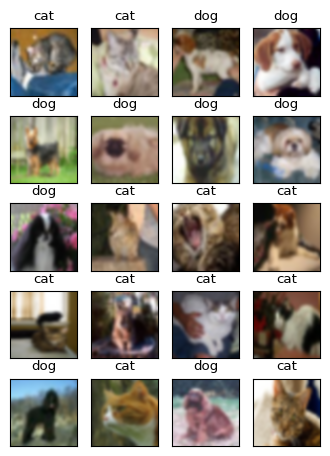

Predicted labels


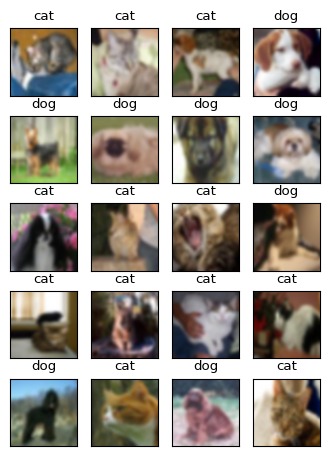

In [ ]:
# Actual labels 
print("Actual labels")
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(4, 5.5),
                         subplot_kw={'xticks': [], 'yticks': []})

# Plot the test images and their actual labels
for i, ax in enumerate(axes.flat):
    if i < 20:
        # Plot the image with bicubic interpolation
        ax.imshow(X_test[i], interpolation='bicubic')

        # Set the title to the actual class name
        actual_idx = np.argmax(Y_test[i])
        ax.set_title(class_names[2*actual_idx + 3])

plt.show()

# Predicted labels
print("Predicted labels")

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(4, 5.5),
                         subplot_kw={'xticks': [], 'yticks': []})



# Plot the test images and their predicted labels
for i, ax in enumerate(axes.flat):
    if i < 20:
        # Plot the image with bicubic interpolation
        ax.imshow(X_test[i], interpolation='bicubic')

        # Set the title to the predicted class name
        pred_idx = np.argmax(y_pred[i])
        ax.set_title(class_names[2*pred_idx + 3])

plt.show()

## Model Accuracy

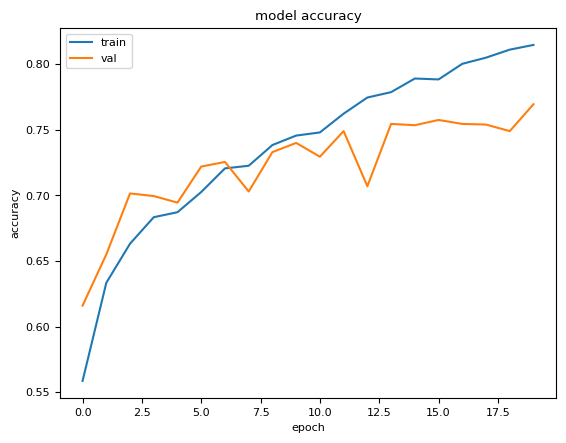

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Model Loss

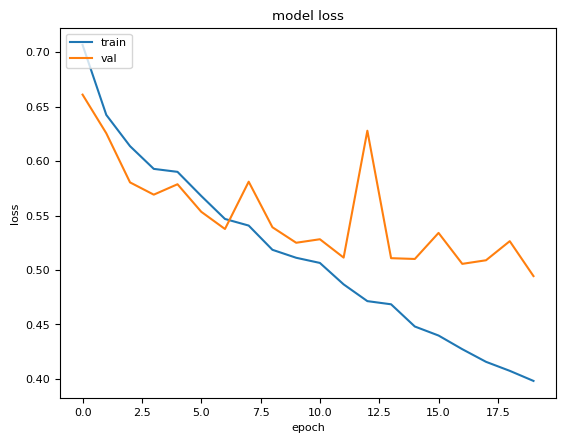

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test, Y_test)

63/63 [==============================] - 0s 4ms/step - loss: 0.4944 - accuracy: 0.7695


[0.4943849742412567, 0.7695000171661377]

## Bird vs Airplane vs Ship

The size of training data is 15000
The size of testing data is 3000
The labels present in testing data are [0 2 8]
Unique labels in Y_test: [0 2 8]


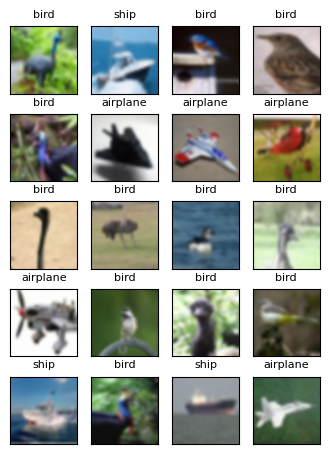

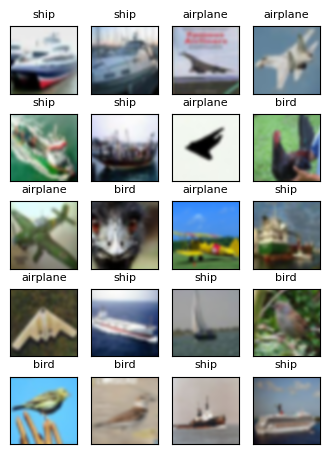

In [ ]:
classes_to_keep = [0, 2, 8]

# building the input vector from the 32x32 pixels
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
keep_indices_train = tf.reduce_any(tf.equal(y_train, classes_to_keep), axis=1)
keep_indices_test = tf.reduce_any(tf.equal(y_test, classes_to_keep), axis=1)
X_train = X_train[keep_indices_train]
Y_train = y_train[keep_indices_train]
X_test = X_test[keep_indices_test]
Y_test = y_test[keep_indices_test]
print('The size of training data is ' + str(X_train.shape[0]))
print('The size of testing data is ' + str(X_test.shape[0]))
unique_labels = np.unique(Y_test)
print('The labels present in testing data are ' + str(unique_labels))
unique_labels = np.unique(Y_test)
print(f"Unique labels in Y_test: {unique_labels}")

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# Plot the first 10 images from the updated training set
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(4, 5.5),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    if i < 20:
        # Plot the image with bicubic interpolation
        ax.imshow(X_train[i], interpolation = 'bicubic')

        # Set the title to the class name
        class_idx = Y_train[i][0]
        ax.set_title(class_names[class_idx], fontdict={'fontsize': plt.rcParams['font.size']})

plt.show()

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(4, 5.5),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    if i < 20:
        # Plot the image with bicubic interpolation
        ax.imshow(X_test[i], interpolation = 'bicubic')

        # Set the title to the class name
        class_idx = Y_test[i][0]
        ax.set_title(class_names[class_idx], fontdict={'fontsize': plt.rcParams['font.size']})

plt.show()

In [ ]:
def my_map(i):
  return int(np.sqrt(i/2))

In [ ]:
Y_test = np.array([my_map(i) for i in Y_test])
Y_train = np.array([int(np.sqrt(i/2)) for i in Y_train])

In [ ]:
num_classes = len(classes_to_keep)
Y_test = to_categorical(Y_test, num_classes)
Y_train = to_categorical(Y_train, num_classes)

In [ ]:
def get_model():
  # building a linear stack of layers with the sequential model
  model = Sequential()

  # convolutional layer
  model.add(Conv2D(32, kernel_size=(1,1), strides=(1,1), activation='elu', input_shape=(32, 32, 3)))

  # convolutional layer
  model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), activation='elu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(64, kernel_size=(1,1), strides=(1,1), activation='elu'))
  model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), activation='elu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(128, kernel_size=(1,1), strides=(1,1), activation='elu'))
  model.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), activation='elu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  # flatten output of conv
  model.add(Flatten())

  # hidden layer
  model.add(Dense(1024, activation='elu'))
  model.add(Dropout(0.3))
  model.add(Dense(512, activation='elu'))
  model.add(Dropout(0.3))
  # output layer
  model.add(Dense(3, activation='softmax'))
  return model

In [ ]:
model = get_model()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        128       
                                                                 
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 15, 15, 64)        2112      
                                                                 
 conv2d_15 (Conv2D)          (None, 13, 13, 64)        36928     
                                                      

In [ ]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=20 , validation_data=(X_test,Y_test))
# Stores the predicted value 
y_pred = model.predict(X_test)

Epoch 1/20
118/118 [==============================] - 5s 19ms/step - loss: 0.8507 - accuracy: 0.6035 - val_loss: 0.6331 - val_accuracy: 0.7183
Epoch 2/20
118/118 [==============================] - 2s 14ms/step - loss: 0.6733 - accuracy: 0.7124 - val_loss: 0.5703 - val_accuracy: 0.7497
Epoch 3/20
118/118 [==============================] - 2s 14ms/step - loss: 0.6001 - accuracy: 0.7470 - val_loss: 0.6288 - val_accuracy: 0.7353
Epoch 4/20
118/118 [==============================] - 2s 16ms/step - loss: 0.5414 - accuracy: 0.7809 - val_loss: 0.6117 - val_accuracy: 0.7543
Epoch 5/20
118/118 [==============================] - 2s 14ms/step - loss: 0.5243 - accuracy: 0.7866 - val_loss: 0.5063 - val_accuracy: 0.7880
Epoch 6/20
118/118 [==============================] - 2s 14ms/step - loss: 0.4770 - accuracy: 0.8097 - val_loss: 0.4645 - val_accuracy: 0.8150
Epoch 7/20
118/118 [==============================] - 2s 13ms/step - loss: 0.4506 - accuracy: 0.8208 - val_loss: 0.5560 - val_accuracy: 0.7727

Actual labels


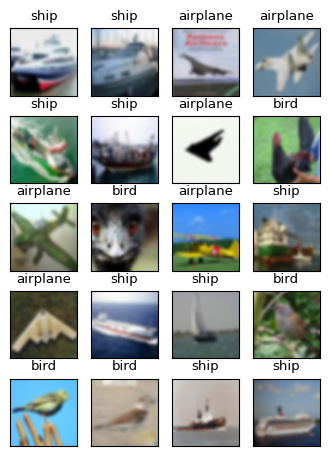

Predicted labels


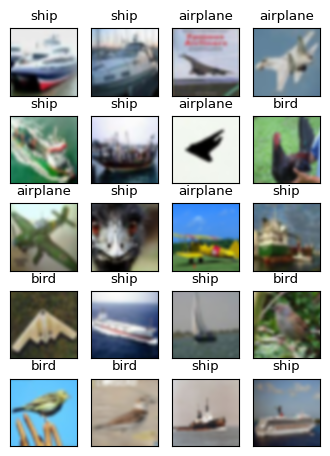

In [ ]:
# Actual labels 
print("Actual labels")
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(4, 5.5),
                         subplot_kw={'xticks': [], 'yticks': []})

# Plot the test images and their actual labels
for i, ax in enumerate(axes.flat):
    if i < 20:
        # Plot the image with bicubic interpolation
        ax.imshow(X_test[i], interpolation='bicubic')

        # Set the title to the actual class name
        actual_idx = np.argmax(Y_test[i])
        ax.set_title(class_names[(2*((actual_idx) * (actual_idx)))])

plt.show()

# Predicted labels
print("Predicted labels")

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(4, 5.5),
                         subplot_kw={'xticks': [], 'yticks': []})



# Plot the test images and their predicted labels
for i, ax in enumerate(axes.flat):
    if i < 20:
        # Plot the image with bicubic interpolation
        ax.imshow(X_test[i], interpolation='bicubic')

        # Set the title to the predicted class name
        pred_idx = np.argmax(y_pred[i])
        ax.set_title(class_names[(2*((pred_idx) * (pred_idx)))])

plt.show()

In [ ]:
class_names1 = ["vehicle", "animal"]

## Model Accuracy

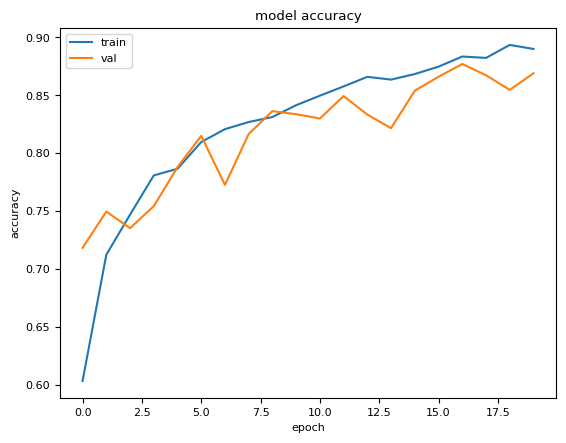

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Model Loss

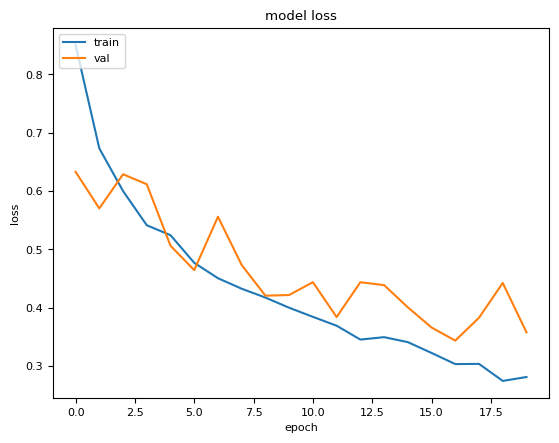

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Performance of Model

In [ ]:
model.evaluate(X_test, Y_test)

94/94 [==============================] - 0s 4ms/step - loss: 0.3578 - accuracy: 0.8690


[0.35782939195632935, 0.8690000176429749]

## Animal vs Vehicle

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255



In [ ]:
# Function which converts it into 2 classes(Animal and Vehicle) 
def my_map(i):
  if abs(i-4.5) >= 3.5:
    return 0
  else:
    return 1

In [ ]:
Y_test = np.array([my_map(i) for i in y_test]) # labels changed to 0 & 1
Y_train = np.array([my_map(i) for i in y_train])

In [ ]:
num_classes = 2
Y_test = to_categorical(Y_test, num_classes)
Y_train = to_categorical(Y_train, num_classes)

In [ ]:
def get_model():
  # building a linear stack of layers with the sequential model
  model = Sequential()

  # convolutional layer
  model.add(Conv2D(32, kernel_size=(1,1), strides=(1,1), activation='elu', input_shape=(32, 32, 3)))

  # convolutional layer
  model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), activation='elu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(64, kernel_size=(1,1), strides=(1,1), activation='elu'))
  model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), activation='elu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(128, kernel_size=(1,1), strides=(1,1), activation='elu'))
  model.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), activation='elu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  # flatten output of conv
  model.add(Flatten())

  # hidden layer
  model.add(Dense(1024, activation='elu'))
  model.add(Dropout(0.3))
  model.add(Dense(512, activation='elu'))
  model.add(Dropout(0.3))
  # output layer
  model.add(Dense(2, activation='softmax'))
  return model

In [ ]:
model = get_model()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        128       
                                                                 
 conv2d_19 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_15 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 15, 15, 64)        2112      
                                                                 
 conv2d_21 (Conv2D)          (None, 13, 13, 64)        36928     
                                                      

In [ ]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=20 , validation_data=(X_test,Y_test))
# Stores the predicted value 
y_pred = model.predict(X_test)

Epoch 1/20
391/391 [==============================] - 10s 16ms/step - loss: 0.3371 - accuracy: 0.8599 - val_loss: 0.3718 - val_accuracy: 0.8514
Epoch 2/20
391/391 [==============================] - 6s 14ms/step - loss: 0.2651 - accuracy: 0.8930 - val_loss: 0.2414 - val_accuracy: 0.9048
Epoch 3/20
391/391 [==============================] - 5s 14ms/step - loss: 0.2453 - accuracy: 0.9023 - val_loss: 0.2584 - val_accuracy: 0.9030
Epoch 4/20
391/391 [==============================] - 5s 14ms/step - loss: 0.2334 - accuracy: 0.9074 - val_loss: 0.2641 - val_accuracy: 0.8911
Epoch 5/20
391/391 [==============================] - 5s 14ms/step - loss: 0.2234 - accuracy: 0.9114 - val_loss: 0.2401 - val_accuracy: 0.9144
Epoch 6/20
391/391 [==============================] - 5s 14ms/step - loss: 0.2145 - accuracy: 0.9151 - val_loss: 0.2743 - val_accuracy: 0.8953
Epoch 7/20
391/391 [==============================] - 6s 14ms/step - loss: 0.2070 - accuracy: 0.9180 - val_loss: 0.1990 - val_accuracy: 0.922

Actual labels


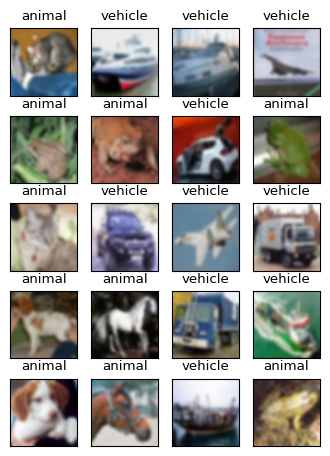

Predicted labels


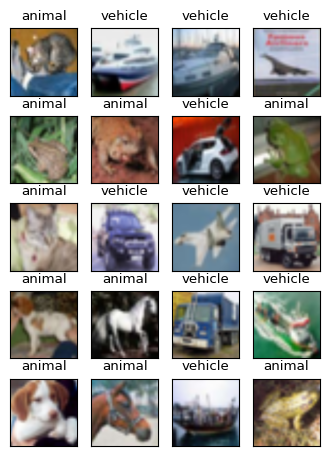

In [ ]:
# Actual labels 
print("Actual labels")
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(4, 5.5),
                         subplot_kw={'xticks': [], 'yticks': []})

# Plot the test images and their actual labels
for i, ax in enumerate(axes.flat):
    if i < 20:
        # Plot the image with bicubic interpolation
        ax.imshow(X_test[i], interpolation='bicubic')

        # Set the title to the actual class name
        actual_idx = np.argmax(Y_test[i])
        ax.set_title(class_names1[my_map(2*((actual_idx) * (actual_idx)))])

plt.show()

# Predicted labels
print("Predicted labels")

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(4, 5.5),
                         subplot_kw={'xticks': [], 'yticks': []})



# Plot the test images and their predicted labels
for i, ax in enumerate(axes.flat):
    if i < 20:
        # Plot the image with bicubic interpolation
        ax.imshow(X_test[i], interpolation='bicubic')

        # Set the title to the predicted class name
        pred_idx = np.argmax(y_pred[i])
        ax.set_title(class_names1[my_map(2*((pred_idx) * (pred_idx)))])

plt.show()

## Model Accuracy

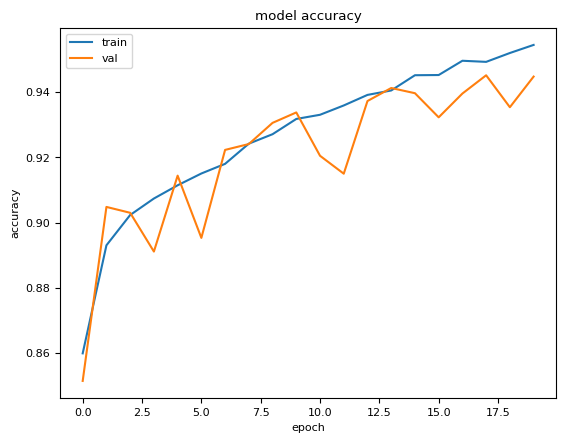

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

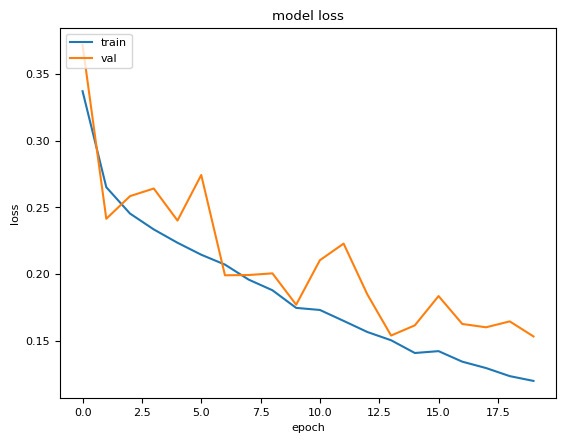

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Performance of Model

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1531 - accuracy: 0.9448


[0.1531449854373932, 0.9448000192642212]